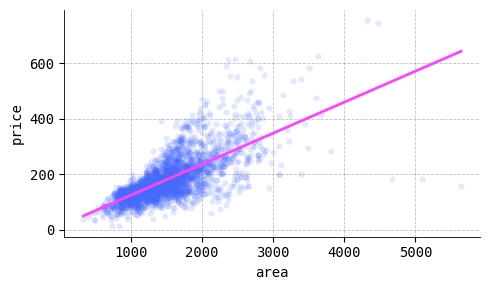

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
#import matplotlib_inline.backend_inline
import seaborn as sns
import scipy as sp
from itertools import product
import warnings
plt.style.use('./aux-files/custom_style_light.mplstyle')
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
warnings.filterwarnings('ignore')
blue = '#486AFB'
magenta = '#FD46FC'

# linear regression example begins below

# import linear regression model from scikit-learn
from sklearn.linear_model import LinearRegression

# import data
url = 'https://raw.githubusercontent.com/jmyers7/stats-book-materials/main/data/data-3-1.csv'
df = pd.read_csv(url, usecols=['area', 'price'])

# pull out the 'area' column and 'price column from the data and convert them to numpy arrays
X = df['area'].to_numpy().reshape(-1, 1)
y = df['price'].to_numpy()

# instantiate a linear regression model
model = LinearRegression()

# train the model
model.fit(X=X, y=y)

# get the learned parameters
beta, beta_0 = model.coef_, model.intercept_

# build a grid for the regression line
grid = np.linspace(X.min(), X.max())

# plot the regression line
plt.plot(grid, beta * grid + beta_0, color=magenta)

# plot the data
plt.scatter(x=X, y=y, alpha=0.15)

plt.xlabel('area')
plt.ylabel('price')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

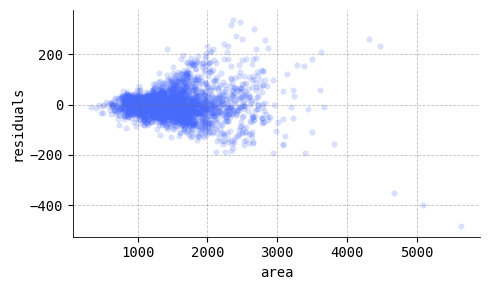

In [24]:
# get the predictions
y_hat = model.predict(X=X)

# get the residuals
resid = y - y_hat

# plot the residuals vs. area
plt.scatter(x=X, y=resid, alpha=0.20)

plt.xlabel('area')
plt.ylabel('residuals')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

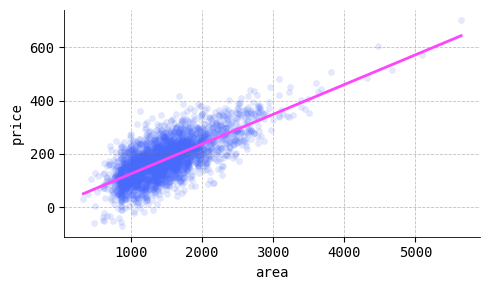

In [25]:
# import statsmodels
import statsmodels.formula.api as smf

# instantiate and train a linear regression model from statsmodels
model = smf.ols(formula='price ~ area', data=df).fit()

# get the learned standard deviation
sigma = np.sqrt(model.scale)

# generate the dataset
np.random.seed(42)
y_gen = sp.stats.norm(loc=y_hat, scale=sigma).rvs(2930)
df_gen = pd.DataFrame({'area': df['area'], 'price': y_gen})

# plot the dataset
df_gen.plot(kind='scatter', x='area', y='price', alpha=0.15)

# plot the original regression line
plt.plot(grid, beta_0 + beta * grid, color=magenta)

plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

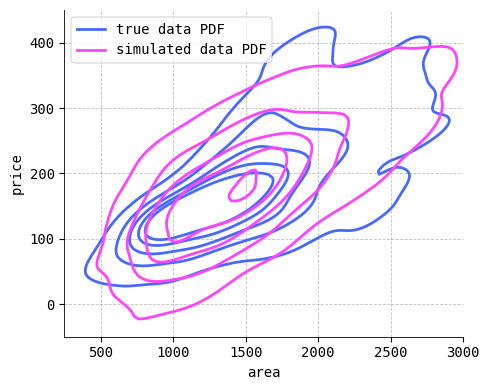

In [26]:
df['indicator'] = 'true data PDF'
df_gen['indicator'] = 'simulated data PDF'
df_combined = pd.concat(objs=[df, df_gen], axis=0)

g = sns.kdeplot(data=df_combined, x='area', y='price', hue='indicator', levels=6)
g.get_legend().set_title(None)
sns.move_legend(obj=g, loc='upper left')
plt.xlim(250, 3000)
plt.ylim(-50, 450)
plt.gcf().set_size_inches(w=5, h=4)
plt.tight_layout()

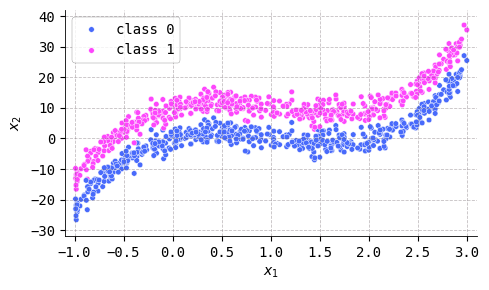

In [27]:
# import the data
url = 'https://raw.githubusercontent.com/jmyers7/stats-book-materials/main/data/ch10-book-data-01.csv'
df = pd.read_csv(url)

# plot the data
g = sns.scatterplot(data=df, x='x_1', y='x_2', hue='y')

# change the default seaborn legend
g.legend_.set_title(None)
new_labels = ['class 0', 'class 1']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(-1.1, 3.1)
plt.ylim(-32, 42)
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

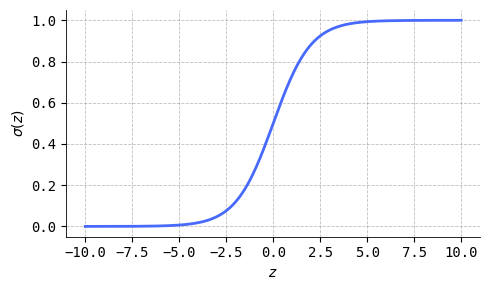

In [28]:
import torch
import torch.nn.functional as F

grid = torch.linspace(start=-10, end=10, steps=300)
plt.plot(grid, F.sigmoid(grid))
plt.gcf().set_size_inches(w=5, h=3)
plt.xlabel('$z$')
plt.ylabel('$\sigma(z)$')
plt.tight_layout()

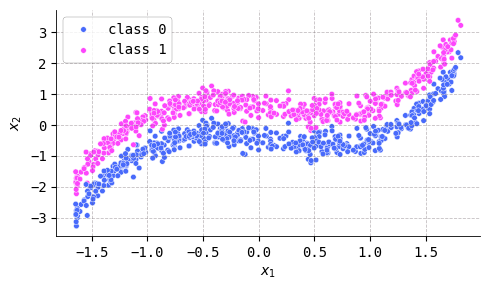

In [29]:
# import scaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# convert the data to numpy arrays
X = df[['x_1', 'x_2']].to_numpy()
y = df['y'].to_numpy()

# scale the input data
ss = StandardScaler()
X = ss.fit_transform(X=X)

# replaced the columns of the dataframe with the transformed data
df['x_1'] = X[:, 0]
df['x_2'] = X[:, 1]

# plot the scaled data
g = sns.scatterplot(data=df, x='x_1', y='x_2', hue='y')

# change the default seaborn legend
g.legend_.set_title(None)
new_labels = ['class 0', 'class 1']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

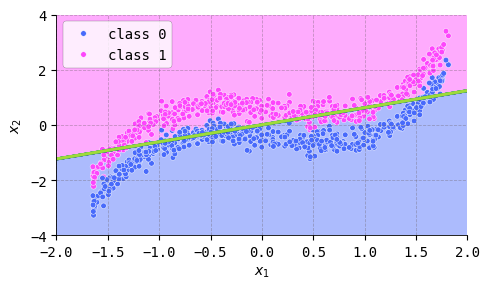

In [30]:
# import logistic regression model from scikit-learn
from sklearn.linear_model import LogisticRegression

# instantiate a logistic regression model
model = LogisticRegression()

# train the model
model.fit(X=X, y=y)

# begin code to plot decision boundary. define resolution of grid.
resolution = 1000

# define grid
x_1 = np.linspace(-2, 2, resolution)
x_2 = np.linspace(-4, 4, resolution)
grid_1, grid_2 = np.meshgrid(x_1, x_2)
grid = np.column_stack((grid_1.reshape((resolution ** 2, -1)), grid_2.reshape((resolution ** 2, -1))))

# apply the fitted model to the grid
z = model.predict(grid)

# plot the decision boundary and colors
z = z.reshape((resolution, resolution))
cmap = clr.LinearSegmentedColormap.from_list('custom', [blue, magenta], N=2)
plt.contourf(grid_1, grid_2, z, cmap=cmap, alpha=0.45)
plt.contour(grid_1, grid_2, z)

# plot the data
g = sns.scatterplot(data=df, x='x_1', y='x_2', hue='y')

# change the default seaborn legend
g.legend_.set_title(None)
new_labels = ['class 0', 'class 1']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

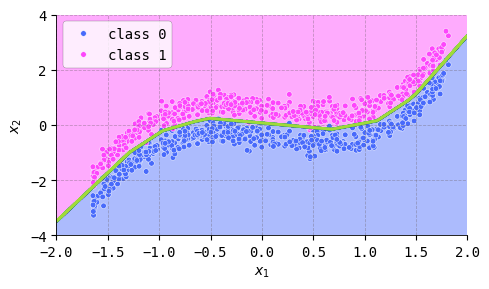

In [31]:
# import pytorch
import torch

# convert the data to torch tensors
X = torch.tensor(data=X, dtype=torch.float32)
y = torch.tensor(data=y, dtype=torch.float32)

# define the neural network model architecture
torch.manual_seed(42)
model = torch.nn.Sequential(torch.nn.Linear(in_features=2, out_features=16),
                   torch.nn.ReLU(),
                   torch.nn.Linear(in_features=16, out_features=1),
                   torch.nn.Sigmoid())

# define the loss function and optimizer
loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

# train the model
num_epochs = 8000
for _ in range(num_epochs):
    optimizer.zero_grad()
    y_hat = model(X)
    loss = loss_fn(y_hat.squeeze(), y)
    loss.backward()
    optimizer.step()

# apply the fitted model to the grid
grid = torch.tensor(data=grid, dtype=torch.float32)
z = (model(grid) >= 0.5).to(torch.int32)

# plot the decision boundary and colors
z = z.reshape((resolution, resolution))
cmap = clr.LinearSegmentedColormap.from_list('custom', [blue, magenta], N=2)
plt.contourf(grid_1, grid_2, z, cmap=cmap, alpha=0.45)
plt.contour(grid_1, grid_2, z)

# plot the data
g = sns.scatterplot(data=df, x='x_1', y='x_2', hue='y')

# change the default seaborn legend
g.legend_.set_title(None)
new_labels = ['class 0', 'class 1']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

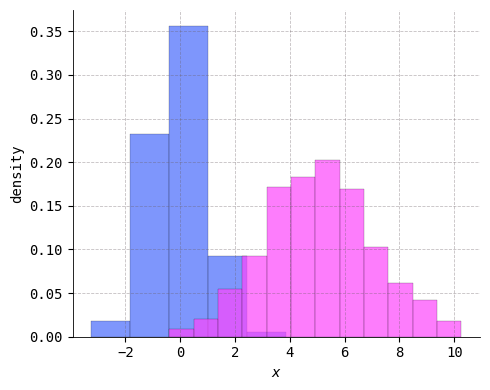

In [32]:
np.random.seed(42)
class_0 = sp.stats.norm(loc=0, scale=1).rvs(size=512)
class_1 = sp.stats.norm(loc=5, scale=2).rvs(size=512)

X = np.concatenate((class_0, class_1))
X = X.reshape(-1, 1)

plt.hist(x=class_0, alpha=0.7, ec='black', bins=5, density=True)
plt.hist(x=class_1, alpha=0.7, ec='black', bins=12, density=True)
plt.xlabel('$x$')
plt.ylabel('density')
plt.gcf().set_size_inches(w=5, h=4)
plt.tight_layout()

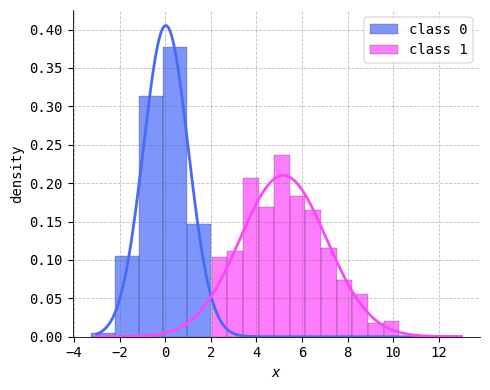

In [33]:
# import gaussian mixture model from scikit-learn
from sklearn.mixture import GaussianMixture

# import data and convert to numpy array
url = 'https://raw.githubusercontent.com/jmyers7/stats-book-materials/main/data/ch10-book-data-02.csv'
df = pd.read_csv(url)
X = df['x'].to_numpy().reshape(-1, 1)

# instantiate the model, fit it to the data, predict components
gmm = GaussianMixture(n_components=2, random_state=42)
z_hat = gmm.fit_predict(X=X)

# cluster the data based on predicted components
class_0 = X[z_hat == 0]
class_1 = X[z_hat == 1]

# pull out the learned parameters
means = gmm.means_
std = np.sqrt(gmm.covariances_)

# define gaussian random variables based on learned parameters
comp_0 = sp.stats.norm(loc=means[0][0], scale=std[0][0][0])
comp_1 = sp.stats.norm(loc=means[1][0], scale=std[1][0][0])

# plot the gaussian density curves
grid = np.linspace(-3, 13, num=300)
plt.plot(grid, comp_0.pdf(grid))
plt.plot(grid, comp_1.pdf(grid))

# plot the data with component labels
plt.hist(x=class_0, alpha=0.7, ec='black', bins=5, density=True, color=blue, label='class 0')
plt.hist(x=class_1, alpha=0.7, ec='black', bins=12, density=True, color=magenta, label='class 1')

plt.legend()
plt.xlabel('$x$')
plt.ylabel('density')
plt.gcf().set_size_inches(w=5, h=4)
plt.tight_layout()